# Analysis of The Offce(US) Complete Transcript - PART 1

We have previously analysed the popularity of The Office as well as the impact of guest stars, directors and writers on ratings and views.  
Now we look at the complete transcript to find out more information about the line distribution between the characters throughout the series, and the top  
speaker of each episode and their impact on episode ratings/viewership.  
We also calculate how many times the characters say their favourite catchphrases.

<img src="https://www.escapeauthority.com/wp-content/uploads/2117/01/thats-what-she-said.jpg" style="height: 500px; width:900px;"/>



#### The Office Dataset: Column Name and Description
**Index**: Index  
**Character**: The Character that said the line  
**Line**: Spoken Text  
**Season**: Season Number: 1 to 9  
**Episode_Number**: Episode Number - varies with each season

#### Table of Contents:
- Importing libraries
- Importing dataset
- Inspecting Data
- Preprocessing of Transcript
- Data Visualisation
    1. Character-Line Analysis
    2. Line Distribution between Characters throughout the series
    3. Top speaker
    4. Frequency of favourite catchphrases
    

## Importing Libraries

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import nltk
from nltk.corpus import stopwords
import spacy
from spacy.tokenizer import Tokenizer

from wordcloud import WordCloud 

In [256]:
#import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en
#!{sys.executable} -m pip install wordcloud

## Importing Dataset

In [257]:
#import dataset

pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/Users/vjfychan/Documents/TheOffice/the-office_lines.csv',index_col=0)
display(df.head(5))
print(df.shape)

,Character,Line,Season,Episode_Number
0,Michael,All right Jim. Your quarterlies look very good. How are things at the library?,1,1
1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,Michael,"So you’ve come to the master for guidance? Is this what you’re saying, grasshopper?",1,1
3,Jim,"Actually, you called me in here, but yeah.",1,1
4,Michael,"All right. Well, let me show you how it’s done.",1,1


(58721, 4)


## Inspecting Data

In [258]:
df.describe(include="all")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58721 entries, 0 to 61306
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character       58721 non-null  object
 1   Line            58721 non-null  object
 2   Season          58721 non-null  int64 
 3   Episode_Number  58721 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [259]:
len(df['Character'].unique()) #742 unique characters

780

## Preprocessing of Transcript
- Some of the lines in the transcript contain no dialogue, only actions, so we need to remove these.
- Some lines were also spoken by multiple characters, so we will split these lines up into one line per character

In [260]:
#Let's remove all the descriptive actions in []
df['Line'] = df['Line'].str.replace(r'[\[].*?[\]]', '', regex=True)

#Drop rows where lines are just actions
df.drop(df.loc[df['Line'] == ' '].index, inplace=True)

In [261]:
#some lines were spoken by multiple characters, example: "Kevin & Andy" or 'Andy And Pam'
#Explode these lines 

df['Character'] = df['Character'].str.replace('&', ',', regex=True)
df['Character'] = df['Character'].apply(lambda row: re.sub(r"\b And\b",',', row))
df['Character'] = df['Character'].str.split(",")
df = df.explode('Character')


In [262]:
df.shape #(58654, 4)

(58654, 4)

## 1. Character-Line Analysis
As there are 742 unique characters in the entire series of the office, we will only focus on characters who have spoken/contributed to more than 1% of the dialogue.

In [263]:
#Group df by Character and count number of lines spoken
sentences = df.groupby(['Character'])[['Line']].count().sort_values('Line', ascending=False)

In [264]:
#Percentge of lines spoken by each character
sentences['percent_of_lines'] = round(sentences['Line']/ sentences['Line'].sum()*100,2)
sentences_one_perc = sentences[sentences['percent_of_lines'] > 1.00] #showing characters with more than 1% of lines as there are 742 Characters
sentences_one_perc = sentences_one_perc.reset_index()

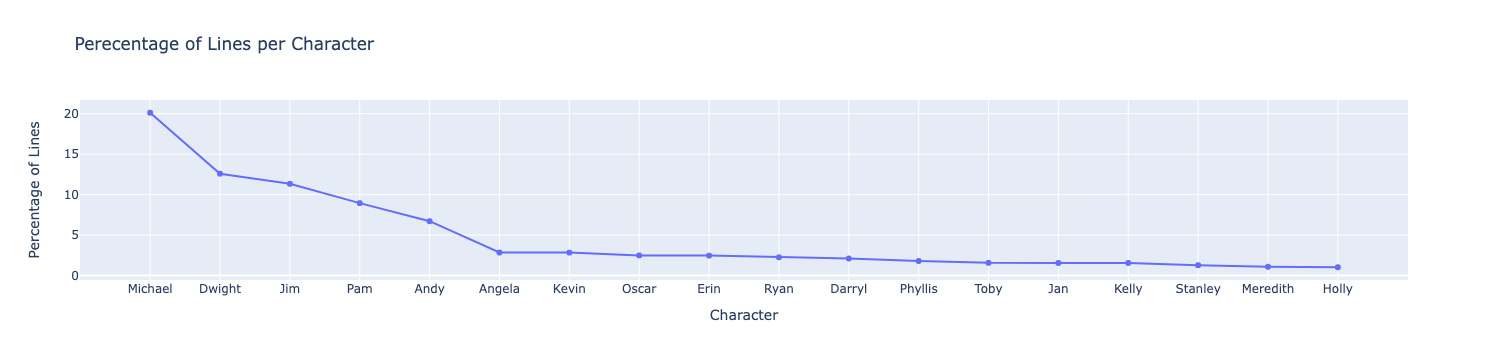

In [265]:
#Plot graph of percentage of lines spoken by each (main) character
fig = px.line(sentences_one_perc, x="Character", y="percent_of_lines", 
              title="Perecentage of Lines per Character",
              text='Line')
              
fig.update_traces(mode="markers+lines")
fig.update_traces(hovertemplate='Character: %{x} <br> Percentage of Lines: %{y}% <br> Total Lines Contributed:%{text:,}') 
fig['layout']['yaxis']['title']='Percentage of Lines'
fig.show()


Michael Scott, regional manger of the Dunder Mifflin Scranton branch, unsurprisingly has contributed to the dialogue significantly more than any of the other characters.  
Michael contributed to 20.12% of the dialogue.  
Dwight contributed 12.59%, which is 7.53% less than Michael.   
Jim contributed 11.34%, which is 8.78% less than Michael.  

Looking at the dialogue percentage, the top speakers are:  
1. **Michael** (Regional Manager)
2. **Dwight** (Salesman/ Assistant to the Regional Manager)
3. **Jim** (Salesman)
4. **Pam** (Receptionist) 
5. **Andy** (Salesman)

Ryan was actually a series regular since Season 1. So it is surpring that he has spoken less lines than Erin who only joined in Season 5.  
It was also revealed in the "Office Ladies" podcast, that the secondary cast (including Angela, Kevin, Oscar etc) were only promoted to series regulars in Season 2 Ep 11 - "Booze Cruise".  
However, B.J Novak who played Ryan also served as a writer, producer and director.  
So he did contribute to the show siginficantly in other ways!

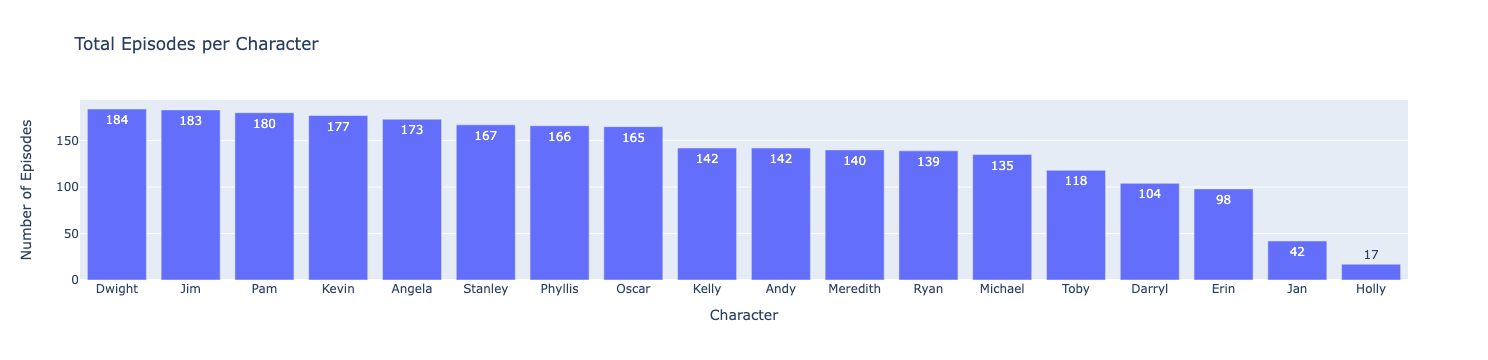

In [266]:
#Let's find the number of appearances of these characters

appearance = df.sort_values(by=['Season','Episode_Number']).drop_duplicates(['Season','Episode_Number','Character'], keep='first')
appearance = appearance.groupby('Character')[['Episode_Number']].count().sort_values('Episode_Number', ascending=False).reset_index()
appearance_main = appearance[appearance['Character'].isin(sentences_one_perc['Character'])]
appearance_main

#Plot graph of percentage of lines spoken by each (main) character
fig = px.bar(appearance_main, x="Character", y="Episode_Number", 
              title="Total Episodes per Character", text_auto=True)
              
fig.update_traces(hovertemplate='Character: %{x} <br> No. of Episodes %{y} <br>', textangle=0) 
fig['layout']['yaxis']['title']='Number of Episodes'

fig.show()


From the above graph, we can see that Dwight has appeared in every single epsiode.  
Michael Scott who left at the end of Season 7, appeared in around 27% less episodes than Dwight.  
However, Michael's contribution to dialogue remains significantly higher than any other character.

## 2. Line Distribution throughout the 9 seasons
We look at the total number of lines spoken by each character per season.  
Again, we will only be considering characters that have more than 1% contribution to the entire dialogue.

In [267]:
#Change 'Season' column to object type as it is a categorical variable, not numerical.
df['Season'] = df['Season'].astype(object)

#### Lines spoken by each character per season

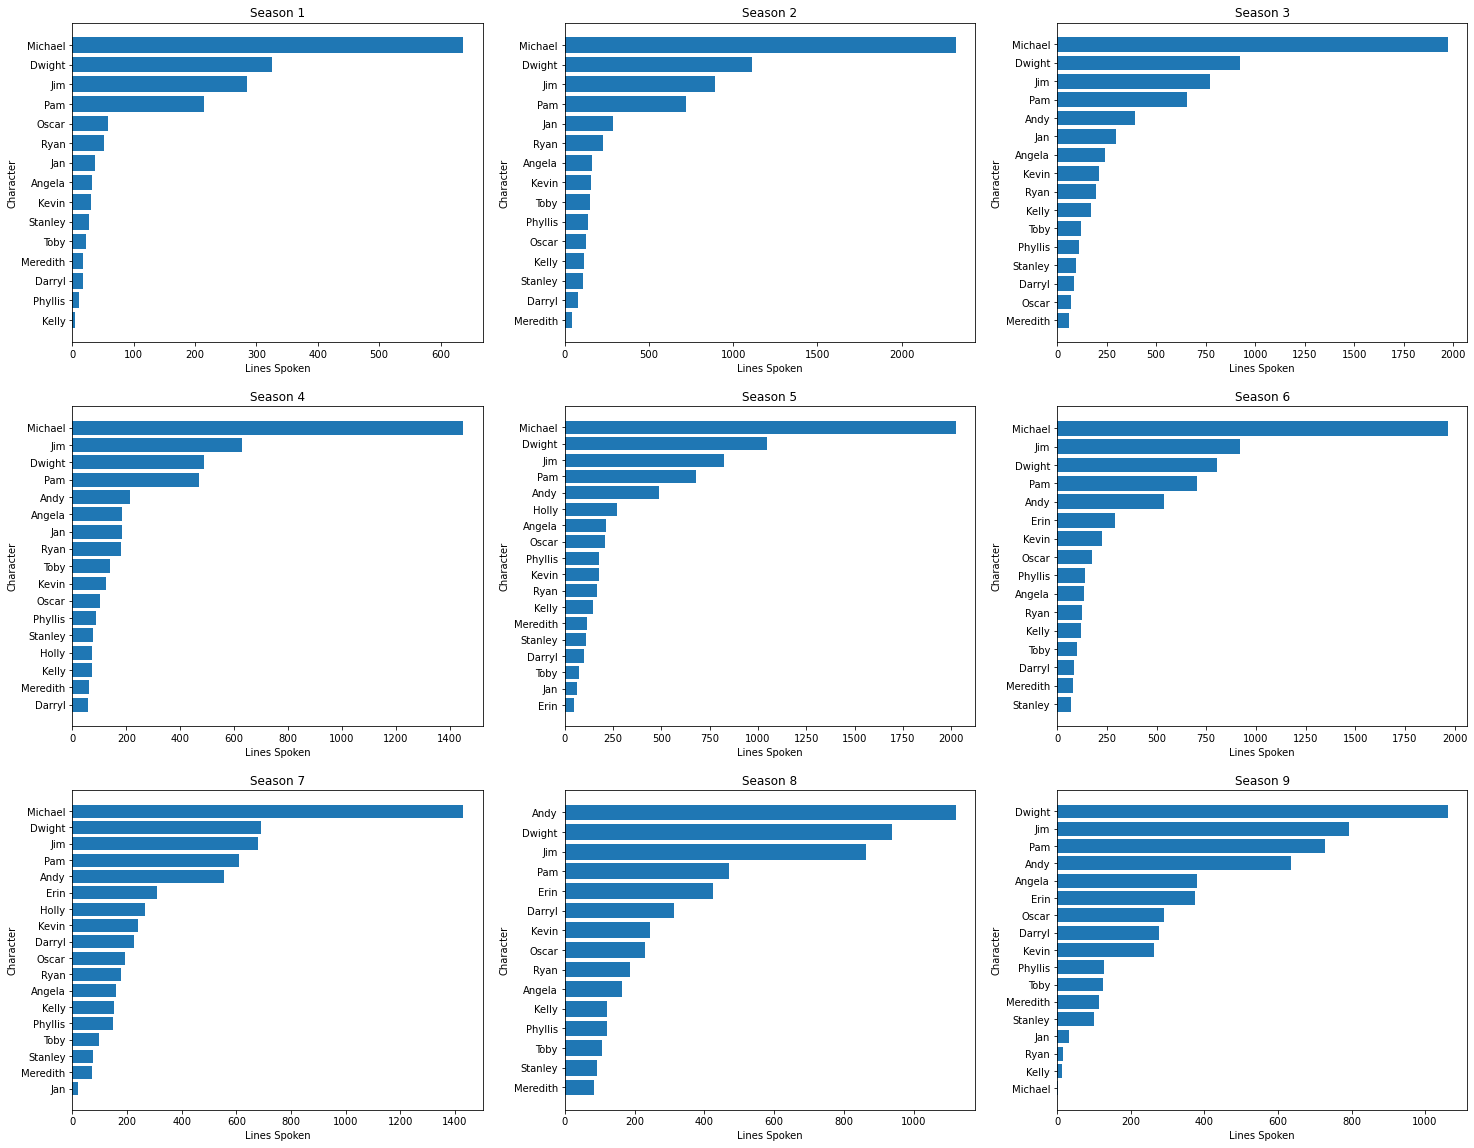

In [268]:
#Group by Character and Season, and count number of lines spoken
line_dist = df.groupby(['Character','Season'])[['Line']].count().reset_index().sort_values(by='Line',ascending=False)

#Only look at characters with more than 1% contribution to dialogue
line_dist = line_dist[line_dist['Character'].isin(sentences_one_perc['Character'])]

plt.figure(figsize=(25,20))


for i in range(1,10):
    season_character_lines = line_dist[line_dist['Season']==i].sort_values(by='Line')
    plt.subplot(3, 3, i)
    plt.barh('Character','Line',data=season_character_lines)
    plt.xlabel('Lines Spoken')
    plt.ylabel('Character')
    plt.title(f'Season {i}')
    

#### Percentage of Lines spoken by each character per season
- Comparing between the percentage of lines spoken per character per season. 
- Easier to make comparisons because the length of each series varies

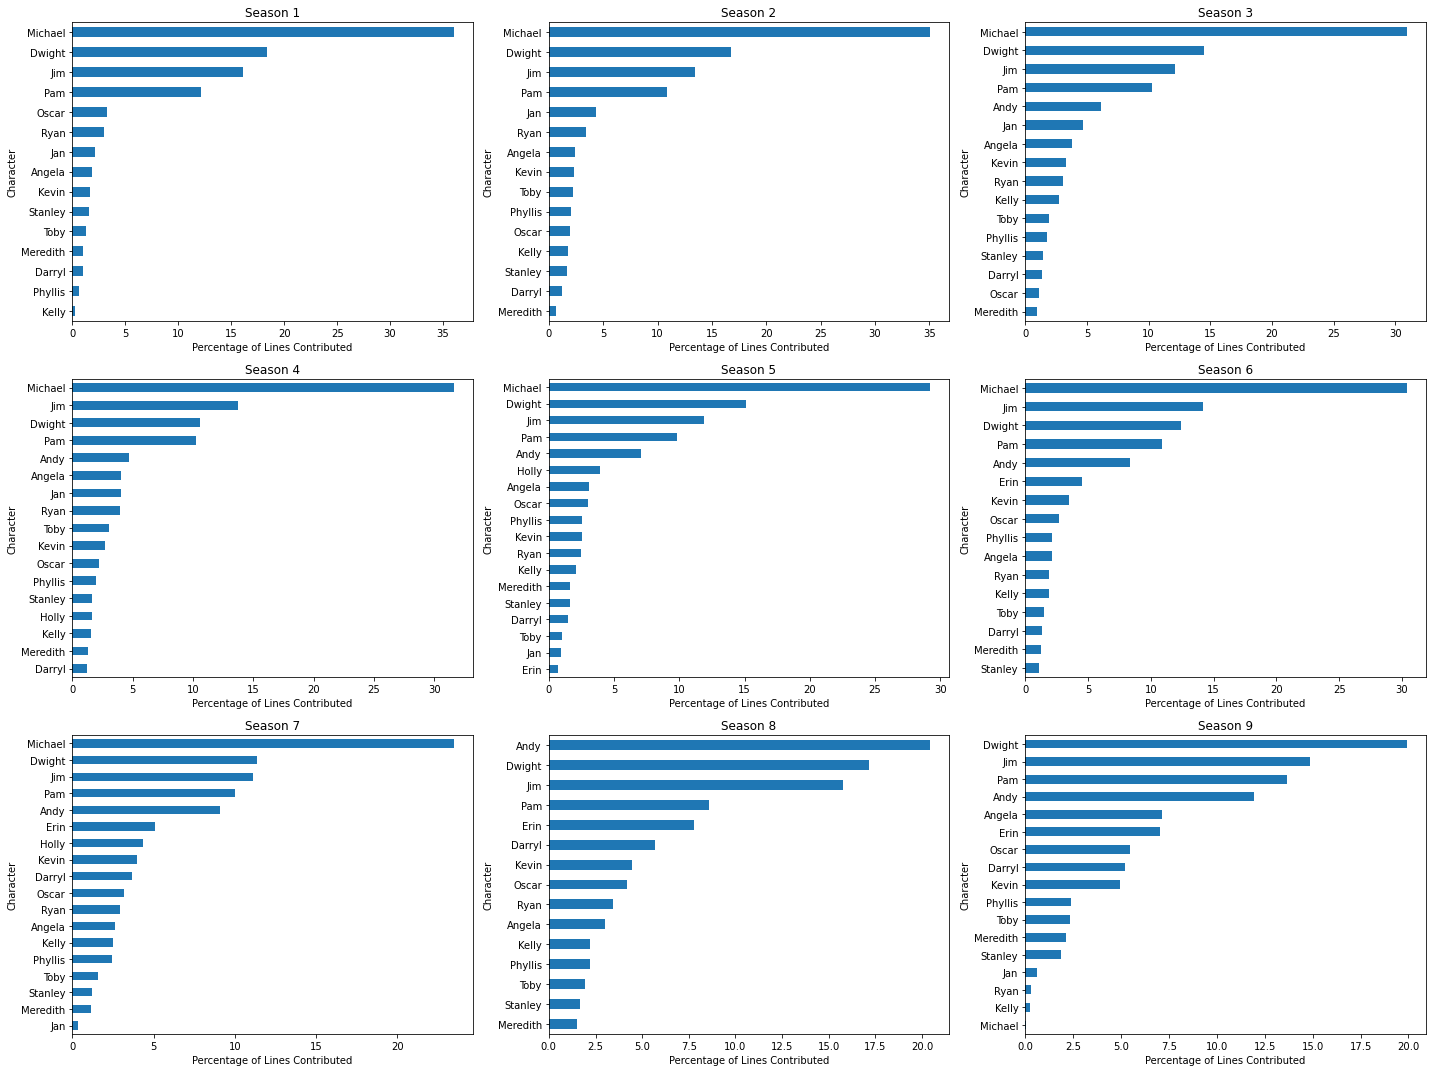

In [269]:

fig = plt.figure(figsize=(20,15))

for i in range(1,10):
     #Histogram for each team
    s_lines = df[(df['Season']==i)& (df['Character'].isin(sentences_one_perc['Character']))]
    s_lines = s_lines.groupby(['Character','Season'])[['Line']].count().reset_index()
    s_lines['Perc_Line'] = s_lines['Line']/s_lines['Line'].sum()*100
    s_lines = s_lines.sort_values(by='Perc_Line', ascending=True)
    
    ax = fig.add_subplot(3,3,i)
    
    s_lines.plot(x='Character',y='Perc_Line', kind='barh', ax=ax)
    ax.get_legend().remove()
    ax.set_xlabel('Percentage of Lines Contributed')
    ax.set_title(f'Season {i}')
    
plt.tight_layout()
plt.show()

#### Some observations:
- We can see that up to Season 7, Michael was always the Top Speaker. The second place was shared between Jim and Dwight.
- After Michael left, Andy became the Top Speaker of Season 8. From previous analysis, it was showed that Season 8 had the lowest ratings.
- From Season 8 onwards, we see the dialogue being more distributed amongst the other characters.  
The Top Speaker has <20% of the dialogue.
Unlike in previous seasons, where the Top Speaker contribute >30%.

- Darryl only started contributing more from Season 7 onwards. This can be attributed to his promotion to warehouse manager in "St Patrick's Day"(S6E19),  
and subquent promotion to Assitant Regional Manager in "A.A.R.M" (the second to last episode of S9).  
The writers had intended for Darryl to have a managerial role in the end.


## 3. Finding the top speaker of each episode
a) How does the top speaker influence the Ratings?  
b) How does the top speaker influence the Viewership?

To answer these questions, we will create a dataframe that shows the Top Speaker of each episode.  
Then, merge with our 'Series' dataframe about viewership and ratings.

In [270]:
#Find the top speaker with the most lines for each episode
line_top = df.groupby(['Character','Season','Episode_Number'])[['Line']].count().reset_index() #Count no. of lines for each character per ep
top_speaker_df = line_top.sort_values(by=['Season','Episode_Number','Line'],ascending=False) #Sort table in descending order (most number of lines)
top_speaker_df = top_speaker_df.drop_duplicates(subset=['Season','Episode_Number'], keep="first") #Drop duplicates and keep the top speaker

display(top_speaker_df.head())

,Character,Season,Episode_Number,Line
1208,Dwight,9,23,75
1819,Jim,9,22,89
302,Andy,9,21,68
301,Andy,9,20,39
1204,Dwight,9,19,61


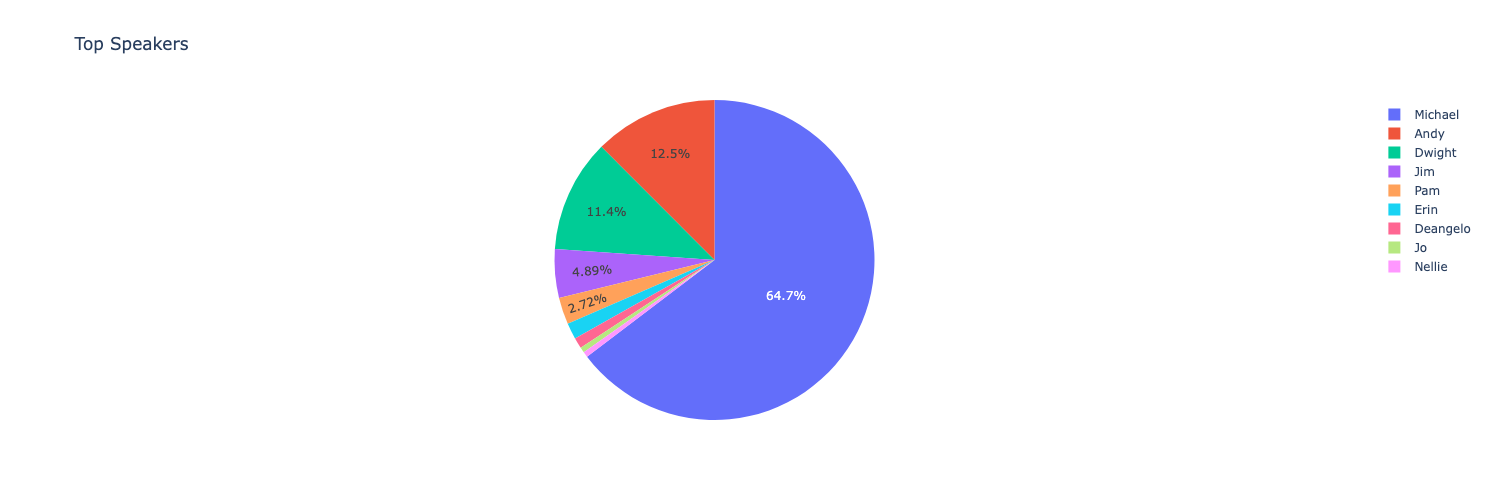

In [271]:
top_speaker_df_sort = top_speaker_df.groupby('Character')[['Season']].count().reset_index()
top_speaker_df_sort
fig = px.pie(top_speaker_df_sort, values='Season', names='Character', 
             labels={'Season':'No. of Top Speaker Episodes'},
             title='Top Speakers')

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',autosize=False,width=500,height=500)

fig.show()

We see that Michael is the Top Speaker 65% of the time.  
Although Andy appeared in 42 less episodes than Dwight, Andy was the Top Speaker for 2 more episodes than Dwight.

#### Import dataset containing Ratings and Viewership
This dataset does not contain the episode numbers so we need to generate this.  
Once we have the episode numbers, we can merge with our 'top_speaker_df' dataframe created above.

In [272]:
#import 'series' dataset containing information about ratings and viewership of all the episodes
series = pd.read_csv('/Users/vjfychan/Documents/TheOffice/the_office_series.csv', index_col=0)

#Count how many episodes are there per episode
series_unique = series[['Season','EpisodeTitle']]
series_unique = series_unique.groupby('Season')['EpisodeTitle'].count().reset_index()

#Create an empty list to store episode numbers
ep_numb = []

#Add to list the episode number by using the length of each season as range
#Find number of episodes per series and store as list, eg [[1,2,3,4,5,6],[1,2,3,4,5,6,7]....]
for i in range(len(series_unique)):
    ep_numb.append([x for x in range(1,series_unique['EpisodeTitle'][i]+1)])

#Expand sublists in our "ep_numb" list into a list that can be stored as a column in our series dataframe, i.e flatten the list
ep_numb_flat = [item for sublist in ep_numb for item in sublist]

series['ep_numbers'] = ep_numb_flat
#series.head()

In [273]:
#Merge two tables: Top Speakers table and Series table
merged_speaker_series = top_speaker_df.merge(series, how='left', left_on=['Season','Episode_Number'], right_on=['Season','ep_numbers'])


In [274]:
merged_speaker_series.head()

,Character,Season,Episode_Number,Line,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,ep_numbers
0,Dwight,9,23,75,Finale,"One year later, Dunder Mifflin employees past and present reunite for a panel discussion about the documentary and to attend Dwight and Angela's wedding.",9.8,10515,5.69,51,16 May 2013,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nancy Walls",Ken Kwapis,Greg Daniels,23
1,Jim,9,22,89,A.A.R.M.,"Dwight prepares for a marriage proposal and hires an assistant for his assistant, Andy auditions for a singing program, Darryl tries to leave his job without a fuss, and Pam has second thoughts about Jim staying in Scranton.",9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester,22
2,Andy,9,21,68,Livin' the Dream,"Dwight becomes regional manager after Andy quits his job, Jim dedicates more time to his Dunder Mifflin job to save his marriage, and Angela has problems with her new living arrangements after her breakup with The Senator.",9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,21
3,Andy,9,20,39,Paper Airplane,"The employees hold a paper airplane competition, Andy gets an acting role in a workplace safety video, and Jim and Pam's marriage tensions continue to build.",8.0,2007,3.25,22,25 April 2013,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,20
4,Dwight,9,19,61,Stairmageddon,"Dwight shoots Stanley with a bull tranquilizer after he refuses to go on a sales call, Jim and Pam head to marriage counseling, The Senator comes out of the closet, and Andy tries to find a talent agent.",8.0,1985,3.83,22,11 April 2013,NaN,Matt Sohn,Dan Sterling,19


#### a) How does the top speaker influence the Ratings?  

In [275]:
#Create list of Top Speakers in descending order of appearance
top_speakers_list = merged_speaker_series.groupby('Character').count().sort_values(by='Season', ascending=False).index

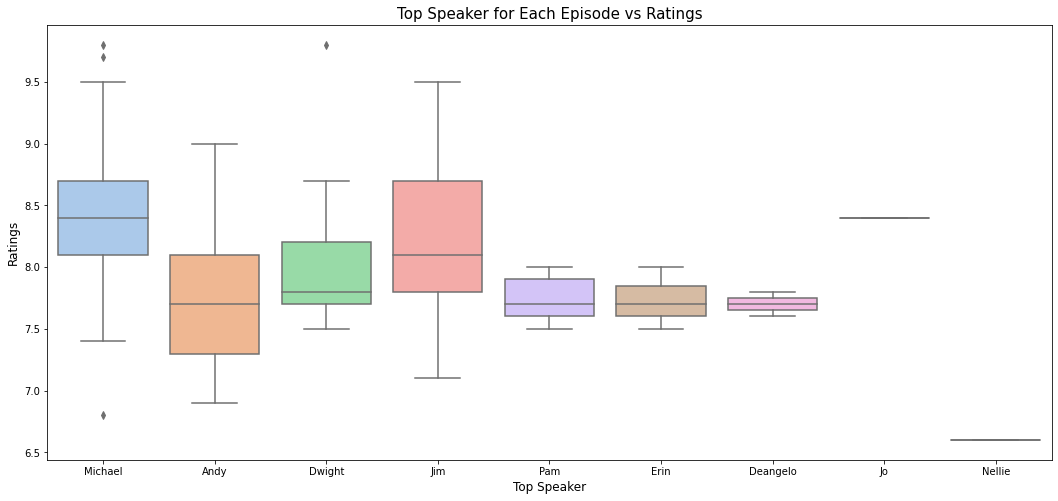

In [276]:
plt.figure(figsize=(18,8))

#Create a box plot to show the variance in ratings for each Top Speaker
ax = sns.boxplot(data=merged_speaker_series,x='Character',y='Ratings', palette='pastel', order=top_speakers_list)
ax.set_title('Top Speaker for Each Episode vs Ratings', fontsize=15)
ax.set_xlabel('Top Speaker', fontsize=12)
ax.set_ylabel('Ratings', fontsize=12)

plt.show()

#### Some observations:
1) The median ratings were highest when Michael was the top speaker, followed by Jim, then Dwight, Andy, Pam and Erin.
2) Episodes where Michael and Jim were the top speaker had similar ratings. But looking at the IQR, Jim had a slightly greater spread than Michael.
3) Andy replaced Michael as the Regional Manger in Season 8, resulting in Andy having 23 episodes of being the Top Speaker.  
Episodes where Andy was a top speaker generally had lower ratings.
4) Deangelo, Jo and Nellie were only Top Speaker for 1 or 2 episodes, so there is not enough data to draw conclusions.

#### b) How does the Top Speaker influence Viewership?

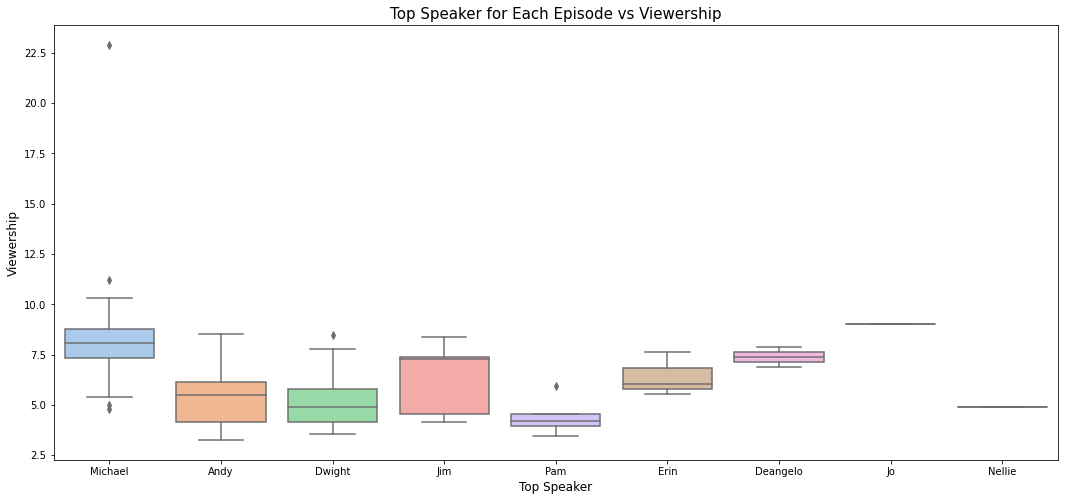

In [277]:
plt.figure(figsize=(18,8))

#Create a box plot to show the variance in Viewership for each Top Speaker
ax = sns.boxplot(data=merged_speaker_series,x='Character',y='Viewership', palette='pastel', order=top_speakers_list)
ax.set_title('Top Speaker for Each Episode vs Viewership', fontsize=15)
ax.set_xlabel('Top Speaker', fontsize=12)
ax.set_ylabel('Viewership', fontsize=12)

plt.show()

#### Some observations:
1) Michael as the Top Speaker had higher a viewership than other characters.
2) Andy and Dwight yielded similar, consistent average viewership.
3) When Pam was the Top Speaker, the viewership tend to be low.  
Perhaps because she mainly acts as a supporting role to the main story line of each episode, and is not as extreme or funny as Michael or Dwight.

## 4. Frequency of Favourite Catchphrases
a) No. of "That's what she said" jokes  
b) No. of times Dwight says 'Michael'  
c) No. of times Angela talks about her cats  
d) No. of times Andy referred to Jim as "Tuna"  
e) No. of times "Dunder Mifflin" was mentioned

#### a) No. of "That's what she said!" jokes
- How many times the joke was said per character?
- What is the TWSS distrubution throughout the 9 seasons?

In [278]:
#Find all the lines containing That's What She Said
df['twss'] = df["Line"].str.contains("That’s what she said", regex=False, case=False)
thats_what_she_said = df[df['twss'] == True]
thats_what_she_said_count = thats_what_she_said.groupby('Character', as_index=False)['twss'].count().sort_values('twss', ascending=False)
thats_what_she_said

,Character,Line,Season,Episode_Number,twss
2694,Michael,That’s what she said. Pam?,2,2,True
2740,Jim,Does that include ‘That’s What She Said’?,2,2,True
2743,Michael,THAT’S WHAT SHE SAID!,2,2,True
5634,Michael,"A, that’s what she said, and B, I wanted it to be impressive. The biggest day of the year deserves the biggest tree of the year.",2,10,True
6675,Dwight,That’s what she said.,2,12,True
6707,Michael,"Uh, that’s what she said. See, haven’t lost my sense of humor. No, no need, it was a non-stick grill.",2,12,True
8083,Michael,That’s what she said!,2,17,True
9394,Michael,"That’s what she said. The thing is, Angela… you are in here an awful lot. You have complained about everybody in the office, except Dwight, which is odd because everyone else has had run ins with Dwight. Toby, by the way, what does “redacted” mean? There is a file full of complaints in here marked “redacted”… ?",2,21,True
10187,Michael,"I am glad that today spurred social change. That’s part of my job as regional manager. But you know what? Even if it didn’t, at least we put this matter to bed. …that’s what she said. Or he said.",3,1,True
11527,Stanley,That’s what she said.,3,5,True


##### i) How many times TWSS was said by each character?

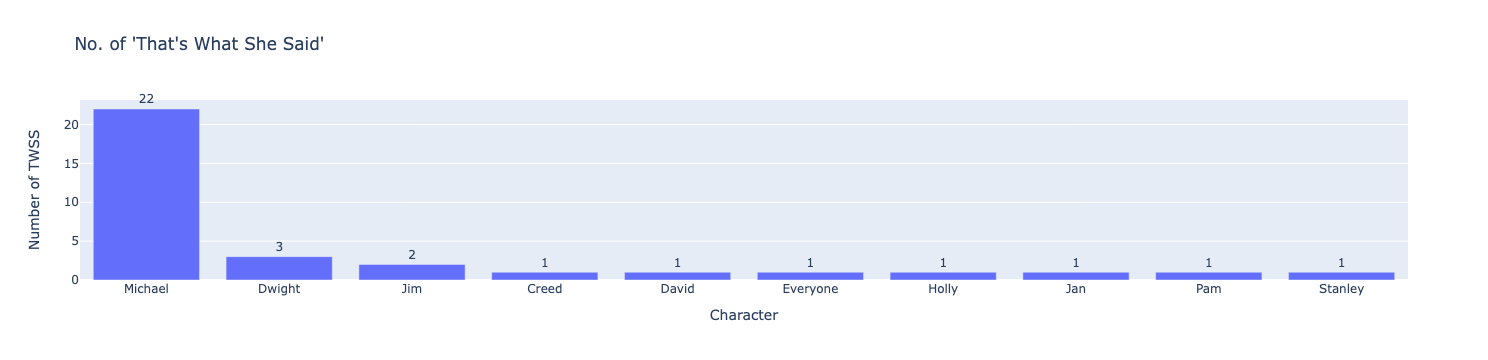

In [279]:
#Plot graph of That's What She Said jokes by each character
fig = px.bar(thats_what_she_said_count, x="Character", y="twss", 
              title="No. of 'That's What She Said'", text_auto=True)
              
fig.update_traces(hovertemplate='Character: %{x} <br> No. of  TWSS: %{y} <br>', textangle=0, textposition="outside",cliponaxis=False ) 
fig['layout']['yaxis']['title']='Number of TWSS'
fig.show()


We see that Michael says the most TWSS jokes, as expected.  
TWSS was said a total of 22 times throughout the entire series.

##### ii) How many times TWSS was said per season?

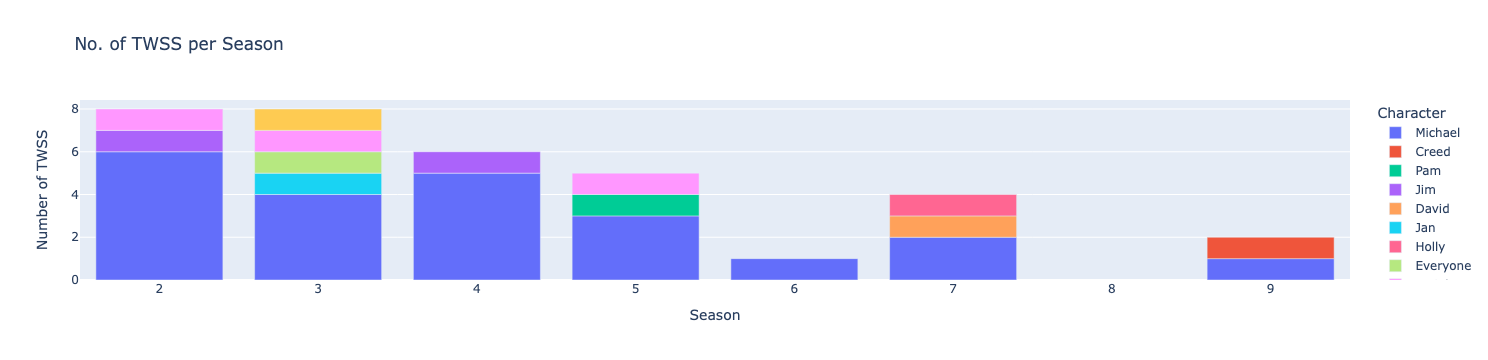

In [280]:
twss_count = thats_what_she_said.groupby(['Character','Season'], as_index=False)['twss'].count().sort_values('twss', ascending=False)

fig = px.bar(twss_count, x="Season", y="twss", color="Character", title="No. of TWSS per Season")
fig['layout']['yaxis']['title']='Number of TWSS'
fig.show()

TWSS jokes were introduced in Season 2.  
TWSS jokes were made 8 times in Season 2 and 3, and decreased throughout the series, but remained a running joke.
However, when Michael left, the joke was not used anymore in Season 8.  
Until in Season 9 when it was said once by Creed in Episode 5, and a final time by Michael in the Season Finale.


#### b) No. of times Dwight says 'Michael'

In [281]:
#Find all lines said by Dwight containing 'Michael'
df_dwight = df.loc[df['Character'] == 'Dwight'].reset_index()
df_dwight_m = df_dwight[df_dwight['Line'].str.contains('Michael', regex=False, case=False) == True].reset_index()

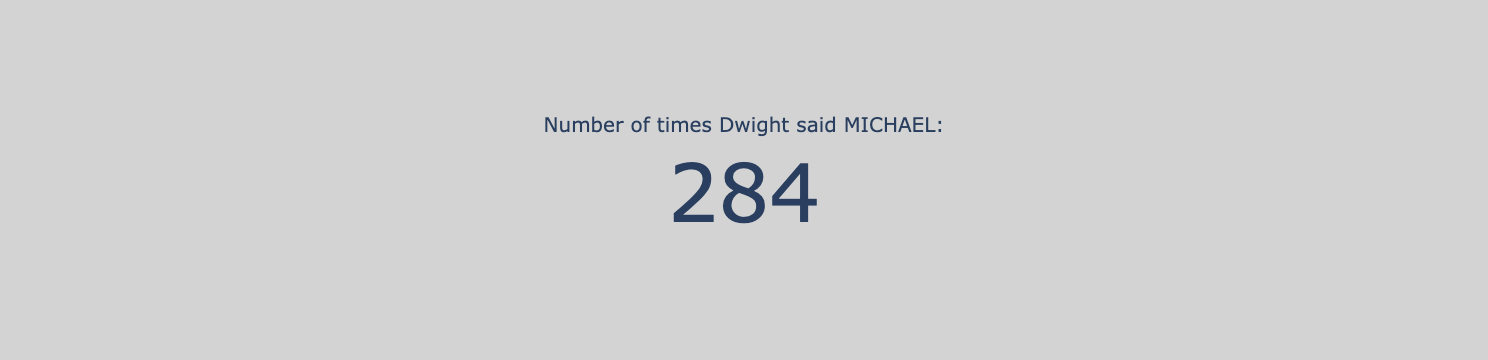

In [282]:
fig = go.Figure(go.Indicator(
    mode = "number",
    value = 284,
    title = 'Number of times Dwight said MICHAEL:'))
fig.update_layout(paper_bgcolor = "lightgray", height=300, width=500)
fig.show()

#### c) No. of times Angela talks about her cats

In [283]:
#list of cat names
cats = ['Sprinkles','Garbage','Bandit','Princess Lady','Mr. Ash ','Petals',\
        'Comstock', 'Ember', 'Milky Way', 'Diane', 'Lumpy',\
        'Tinkie', 'Crinklepuss', 'Bandit 2', 'Pawlick Baggins', 'Lady Aragorn',\
        r"cat$",r"cats", "kitty", 'kittens']

#creating a dataframe for Angela
df_angela = df.loc[df['Character'] == 'Angela'].reset_index()


In [284]:
pattern = '|'.join(cats)

#Create a function to search for strings in our cats list
def pattern_searcher(search_str:str, search_list:str):
    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = True
    else:
        return_str = 'NA'
    return return_str
df_angela["cats"]  = df_angela['Line'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern))
df_angela = df_angela[df_angela["cats"]!='NA']
df_angela.shape #(31, 8)

(31, 7)

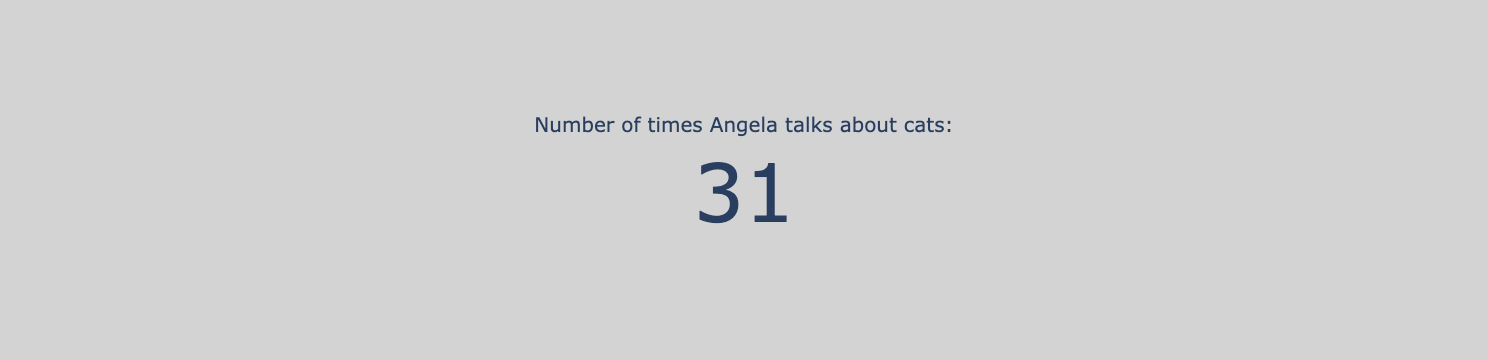

In [285]:
fig = go.Figure(go.Indicator(
    mode = "number",
    value = 31,
    title = 'Number of times Angela talks about cats:'))
fig.update_layout(paper_bgcolor = "lightgray", height=300, width=500)
fig.show()

#### d) No. of times Andy referred to Jim as Tuna (and other variations)


In [286]:
big_tuna_list = ['tuna','Tuna','Big Tuna', 'big tuna']
pattern1 = '|'.join(big_tuna_list)

df_andy = df.loc[df['Character'] == 'Andy'].reset_index()

In [287]:
df_andy["tuna"]  = df_andy['Line'].apply(lambda x: pattern_searcher(search_str=x, search_list=pattern1))
df_andy = df_andy[df_andy["tuna"]!='NA']
df_andy.shape #(58, 7)

(58, 7)

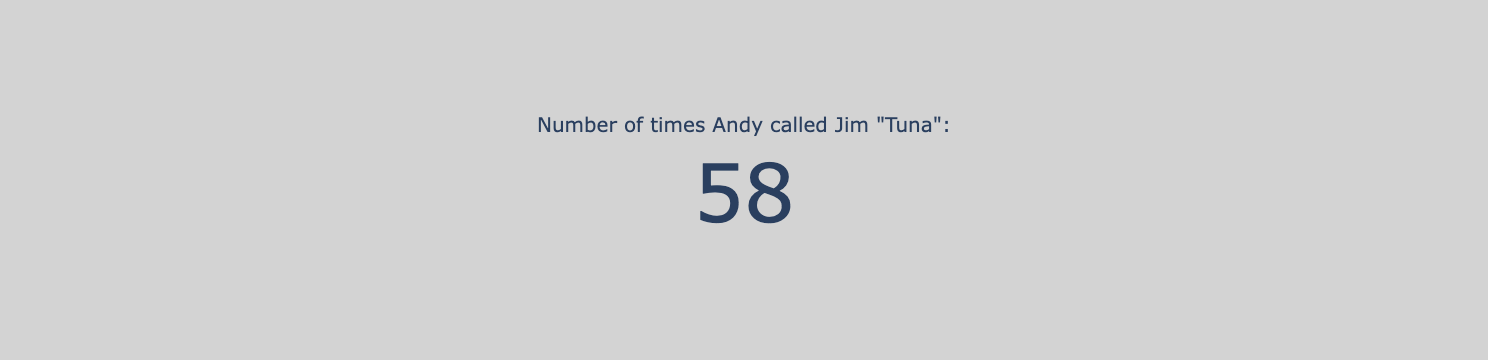

In [288]:
fig = go.Figure(go.Indicator(
    mode = "number",
    value = 58,
    title = 'Number of times Andy called Jim "Tuna":'))
fig.update_layout(paper_bgcolor = "lightgray", height=300, width=500)
fig.show()

#### e) No. of times 'Dunder Mifflin' was said

In [289]:
dm = df[df['Line'].str.contains('Dunder Mifflin', regex=False, case=False) == True].reset_index()
dm = dm[dm['Character'].isin(sentences_one_perc['Character'])]
dm = dm.groupby('Character')[['Line']].count().reset_index().sort_values(by='Line', ascending=False)

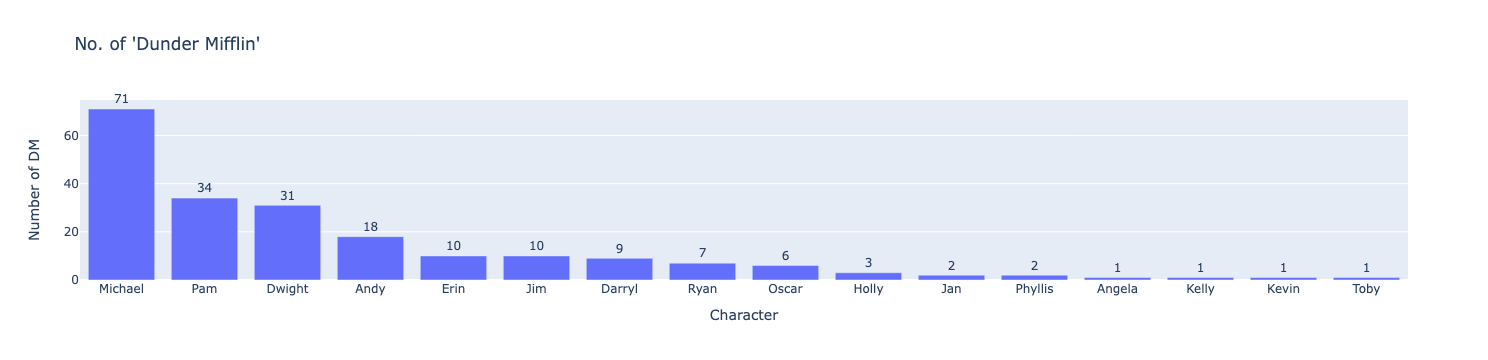

In [290]:
fig = px.bar(dm, x="Character", y="Line", 
              title="No. of 'Dunder Mifflin'", text_auto=True)
              
fig.update_traces(hovertemplate="Character: %{x} <br> No. of  'Dunder Mifflin': %{y} <br>", textangle=0, textposition="outside",cliponaxis=False ) 
fig['layout']['yaxis']['title']='Number of DM'
fig.show()

- Michael says the "Dunder Mifflin" the most number of times, followed by Pam and Dwight.  

- Michael as the Regional Manager had to reference the company name frequently.  
He also had so much love for the company and his staff, so it's unsurprising that 'Dunder Mifflin' comes up a lot in conversation.

- Pam as the receptionist always answered the phone with "Hello, Dunder Mifflin, this is Pam."

- Similar to Michael, Dwight was very loyal to the company, and he always aimed to become the Regional Manager one day.  
So it made sense that he would have mentioned 'Dunder Mifflin' quite a lot during the show. 